In [1]:
import numpy as np
import numpy.random as rnd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) -3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

X는 -3~3까지의 random 값이고 Y는 X로 이루어진 2차 방정식입니다.

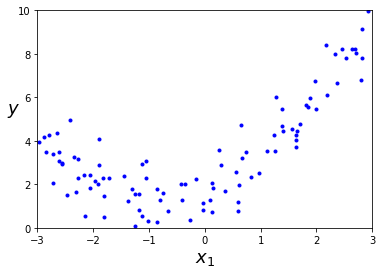

In [4]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [5]:
from sklearn.preprocessing import PolynomialFeatures

In [6]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

scikit-learn 라이브러리의 PolynomialFeatures를 이용해 training data를 제곱한 값(degree=2)을 feature로 추가합니다.

In [7]:
print X[0]

[-0.75275929]


In [8]:
print X_poly[0]

[-0.75275929  0.56664654]


In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

scikit-learn 라이브러리의 LinearRegression을 이용하고 fit method를 이용해 traning dataset에 학습합니다.

In [11]:
print lin_reg.intercept_
print lin_reg.coef_

[ 1.78134581]
[[ 0.93366893  0.56456263]]


학습한 LR 모델의 coefficient(x^2과 x의 기울기)와 intercept(절편)를 가져옵니다.

In [12]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

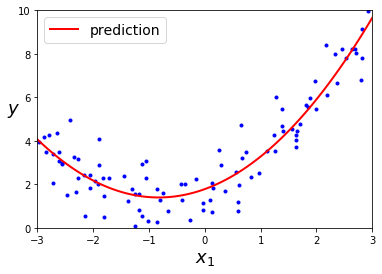

In [13]:
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="prediction")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

2차 LR 모델이 training dataset에 fit된 것을 볼 수 있습니다.

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

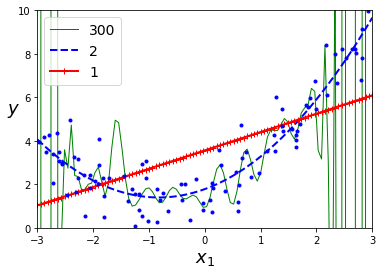

In [15]:
for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)
plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

 - 300차 다항 LR 모델은 training dataset에 대해 overfitting 된 것을 볼 수 있습니다.
 - 1차 LR 모델은 2차 LR 모델에 대해 dataset에 대해 적합하지 않습니다.